# なんで型なんてあるのか

20180907 勉強会

# 型に興味をもったきっかけ

## プログラミングに初めて触れたとき

- 最初に触ったのはC言語
- int, float, char, ...
    - コレ全部覚えなあかんの？
    - ややこしくね？？？
    - なんでわざわざ範囲の狭い型使うの？
        - 全部long long intでええやん！！！

## そして動的型付けの言語を始める


- Python
- JavaScript
- PHP

→型書かんで良いの超ラクじゃん！！！最高！！！

## 再び静的型付けの言語を始める

- 仕事でTypeScript
- ノリでHaskell, Go

→型に興味を持ち始める



# この本を読んだ

- 8章が型の話

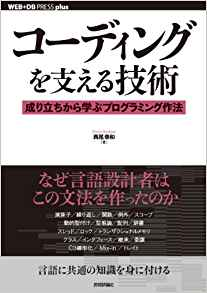

# 静的型付けと動的型付けの違い

## 静的型付けの言語

- プログラムを実行前に型検査を行う
- 効率がいい
    - 型宣言をすることで、その変数に対して適切なデータ領域を確保できる
    - それによって高度な最適化ができる
- コンパイルを通すのが大変だったりする

- 例
    - C, C++, Rust, Go, Haskell, etc.
    


## 動的型付けの言語

- プログラムを実行しながら型検査を行う
- 楽に書ける
- 遅い

- 例
    - Python, JavaScript, PHP, Ruby, etc.

# 強い型付けと弱い型付け

## 強い型付け
- 型安全性がある
- 型検査を通れば、安全さが保証される
- ML, Haskell, etc.


## 弱い型付け
- 型安全性がない
- 検査を通っても安全さは保証されない
- C, C++, etc.


# 本題: なんで型が必要なのか。

# そのまえに..
## 0と1でデータを表す方法

## 例えば浮動小数点数

- IEEE754で定められたものがよく使われる
- 以下の3つの部分で表される
    - 符号
        - 0なら正、1なら負
    - 指数
        - -127~128　(2^8とれる)
        - -127なら小数点を右に127個動かす
        - 128なら小数点を左に128個動かす
        - 127のバイアスが加わる
            - 0個ずらすとき127
    - 仮数
        - 1.XXXXX の XXXXX の部分
- [浮動小数点数シミュレーター](https://tools.m-bsys.com/calculators/ieee754.php)

#### 単精度浮動小数点数の場合はこんなん

- 全体で32bit
    - 符号部に1bit
    - 指数部に8bit
    - 仮数部に23bit


![](http://www.cc.kyoto-su.ac.jp/~yamada/programming/float.png)  
【画像引用元】[浮動小数点数型と誤差](http://www.cc.kyoto-su.ac.jp/~yamada/programming/float.html)

### 例

さっきの32bitで表現してみる！
- 10進数で7.0

#### → 2進数で表す
- 111.0

#### →小数点を左に2つずらす 
- 1.11 * 10^2

### 1.11 * 10^2 とは

- 符号
    - 正数なので0
- 仮数
    - 1.XXX の XXX の部分なので
        - 11
- 指数
    - 10の2乗なので2
    - 127のバイアスを考慮すると129(2^7 + 1)
        - 10000001

    

### 結果

0 10000001 11000000 00000000 0000000

## じゃあこれはなんぼ？

- 0 10000001 11000000 00000000 0000000

## 答え

さっきと同じだから7!!!!!!

と思ったが、   
これが示す型が「浮動小数点数型」ではなく「整数型」の場合、1,088,421,888になる  

どういうことかというと..

### 整数型の場合  
00000000 00000000 00000000 00000001 なら1  
00000000 00000000 00000000 00000010 なら2   
...   
...   
...   
00000000 00000000 00000000 11111111 なら255  
...   


となる

## さっきのは

- 0 10000001 11000000 00000000 0000000

### 整数型の場合

- 2^(6+8+7) + 2^(6+8+8) + 2^(6+8+8+1) + 2^(6+8+8+8)
- = 2097152 + 4194304 + 8388608 + 1073741824
- = 1,088,421,888


### 浮動小数点数型の場合

- さっきみたように7.0



## つまり

- 0 10000001 11000000 00000000 0000000
- これだけみてもコンピュータはどの数値を表しているのかわからない


→ 型いるやん！！！！！！

## 動的型付けの言語はどうしているのか

### 例えばPython

![](https://github.com/mrsekut/slides/blob/master/img/py.png?raw=true)

# 他におもろかったもの

- 型推論についての話
- クラスやinterfaceも型や！！みたいな話